In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv(r'C:\Users\Ayush Yadav\Desktop\PYFe\Untitled Folder\Data\ML data\income.csv')

In [8]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


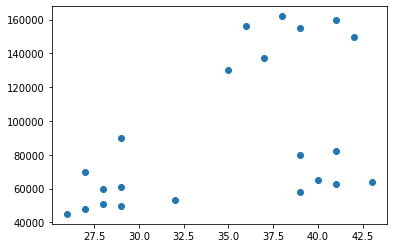

In [10]:
plt.scatter(df['Age'],df['Income($)']);

In [11]:
import seaborn as sns

In [14]:
km = KMeans(n_clusters=3)

In [17]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [18]:
df['cluster'] = y_predicted

In [20]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

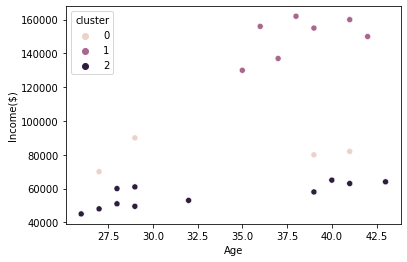

In [22]:
sns.scatterplot(x='Age', y ='Income($)', data = df,hue = 'cluster')

In [25]:
cen = km.cluster_centers_
cen

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [28]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

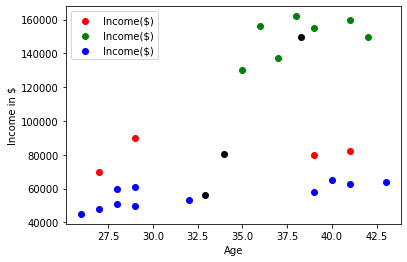

In [42]:
plt.scatter(df0['Age'], df0['Income($)'], color= 'red')
plt.scatter(df1['Age'], df1['Income($)'], color= 'green')
plt.scatter(df2['Age'], df2['Income($)'], color= 'blue')
plt.scatter(cen[:,0],cen[:,1], color = 'black')

plt.xlabel('Age')
plt.ylabel('Income in $')

plt.legend(['Income($)','Income($)','Income($)']);

In [44]:
df.head(2)

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [50]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

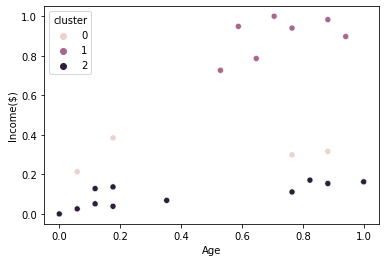

In [51]:
sns.scatterplot(x='Age', y ='Income($)', data=df, hue= 'cluster')

In [53]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [54]:
df['cluster'] = y_predicted

In [55]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [57]:
cen = km.cluster_centers_
cen

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

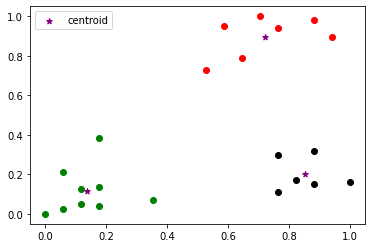

In [59]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

## Elbow plot

In this plot we will try to find how many clusters do we need to make this solution best

In [79]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    

a_float = 3.14159
formatted_float = "{:.2f}".format(a_float)

In [80]:
print(sse)

[5.434011511988176, 2.0911363886990766, 0.4750783498553095, 0.3491047094419565, 0.2664030124668415, 0.2105547899547249, 0.16858512236029757, 0.13265419827245162, 0.10497488680620906]


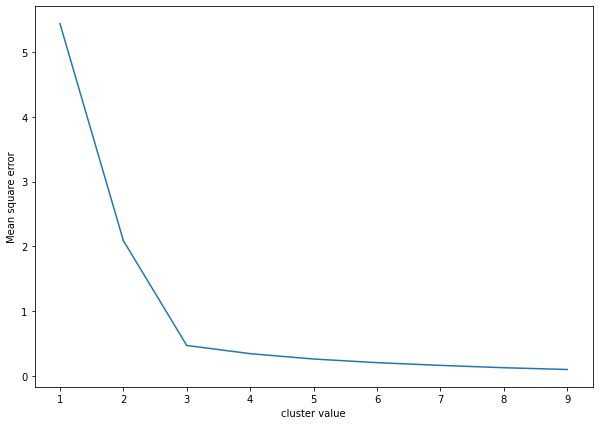

In [84]:
plt.figure(figsize=(10,7))

plt.plot( k_range, sse);
plt.ylabel('Mean square error')
plt.xlabel('cluster value');

so at 3 clusters it is giving us optimal point

# Iris Data set

In [87]:
iris = sns.load_dataset('iris')

In [88]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [89]:
i_df = iris[['sepal_length','sepal_width']]

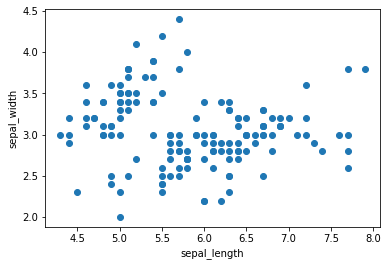

In [106]:
plt.scatter(i_df['sepal_length'], i_df['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width');

In [91]:
i_df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Now lets check how many clusters should be optimum

In [99]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters= k)
    km.fit(i_df[['sepal_length','sepal_width']])
    sse.append(km.inertia_)
    

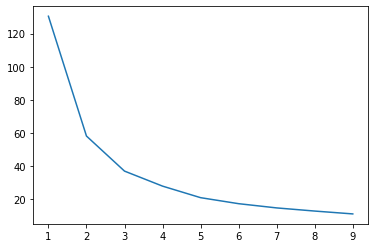

In [100]:
plt.plot(k_range,sse)

3 clusters will be optimum

In [107]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(i_df[['sepal_length','sepal_width']])

In [108]:
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [110]:
i_df['cluster'] = y_predicted

<ipython-input-110-958d0cf5594f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['cluster'] = y_predicted


In [111]:
i_df.head()

,sepal_length,sepal_width,cluster
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2


calculate the centroid of the clusters

In [116]:
cen = km.cluster_centers_

In [117]:
cen

array([[6.81276596, 3.07446809],
       [5.77358491, 2.69245283],
       [5.006     , 3.428     ]])

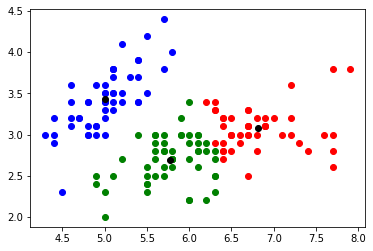

In [118]:
i_df0 = i_df[i_df['cluster']==0]
i_df1 = i_df[i_df['cluster']==1]
i_df2 = i_df[i_df['cluster']==2]

plt.scatter(i_df0.sepal_length, i_df0.sepal_width, color = 'red')
plt.scatter(i_df1.sepal_length, i_df1.sepal_width, color = 'green')
plt.scatter(i_df2.sepal_length, i_df2.sepal_width, color = 'blue')
plt.scatter(cen[:,0],cen[:,1], color = 'black')